# Preliminary Analysis Notebook for BP_AR_3514 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv("/Users/sooyeonkim/Desktop/TenStrands/Policy-Language-Analysis/cleaned_data/BP_AR_3514_cleaned.csv")

## Additional Cleaning 

In [4]:
data = data.drop(columns = ['Unnamed: 0', 'BP 3514 Link to Policy', 'AR 3514 Link to Policy', 
                     'BP3514: Path to PDF', 'AR3514: Path to PDF', 
                     'AR3514 PDF Name', 'BP3514 PDF Name'])

In [5]:
data = data.rename(columns = {'Environmental and Climate Action Score (20 points)': 'Action Score'})

In [6]:
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace(r'\b\d{1,}\b', '', regex=True)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace(r'\b\d{1,}\b', '', regex=True)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace(r'www.*$', '', regex=True)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace(r'www.*$', '', regex=True)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace(r'cdc.*$', '', regex=True)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace(r'cdc.*$', '', regex=True)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace(r'http.*$', '', regex=True)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace(r'http.*$', '', regex=True)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('cfr', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('cfr', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('may', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('may', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('shall', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('shall', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('ccr', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('ccr', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('usc', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('usc', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('cf', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('cf', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('pm boarddocs', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('pm boarddocs', '', regex=False)
data['AR3514: PDF Text'] = data['AR3514: PDF Text'].str.replace('goboarddocscomcaesusdboardnsfgoto', '', regex=False)
data['BP3514: PDF Text'] = data['BP3514: PDF Text'].str.replace('goboarddocscomcaesusdboardnsfgoto', '', regex=False)

In [7]:
data_bp = data.drop(columns = ['AR3514: PDF Text'])
data_ar = data.drop(columns = ['BP3514: PDF Text'])

In [8]:
# Extending stop words list
all_stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# Function to preprocess text 
def preprocess_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    clean_text = ' '.join([word for word in lemmatized_words if word not in all_stopwords])
    return clean_text

def analyze_text(data, column_name):
    vectorizer = CountVectorizer(stop_words=all_stopwords)
    processed_texts = data[column_name].dropna().apply(preprocess_text)
    X = vectorizer.fit_transform(processed_texts)
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    return word_counts.sum().sort_values(ascending=False)

In [9]:
# Run text analysis 
bp3514_text_analysis = analyze_text(data, 'BP3514: PDF Text')
ar3514_text_analysis = analyze_text(data, 'AR3514: PDF Text')

In [10]:
# Function to create a word cloud from a series of word counts
def create_word_cloud(word_counts, title):
    word_frequencies = word_counts.to_dict()
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

## BP Word Cloud (Frequency)

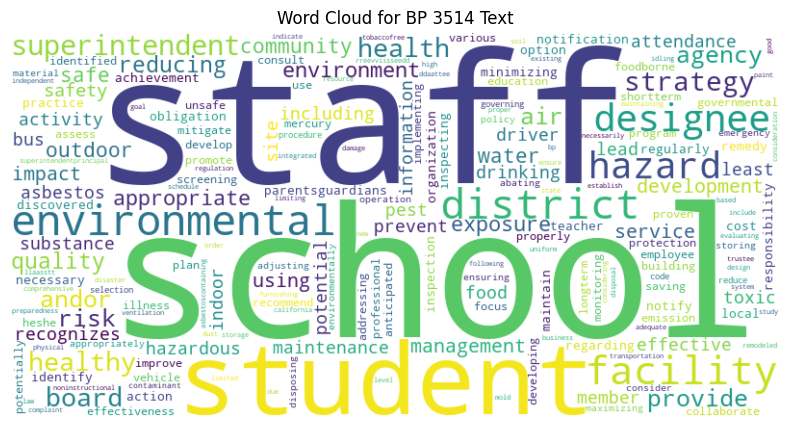

In [11]:
# Create word clouds for BP
create_word_cloud(bp3514_text_analysis, 'Word Cloud for BP 3514 Text')

## AR Word Cloud (Frequency)

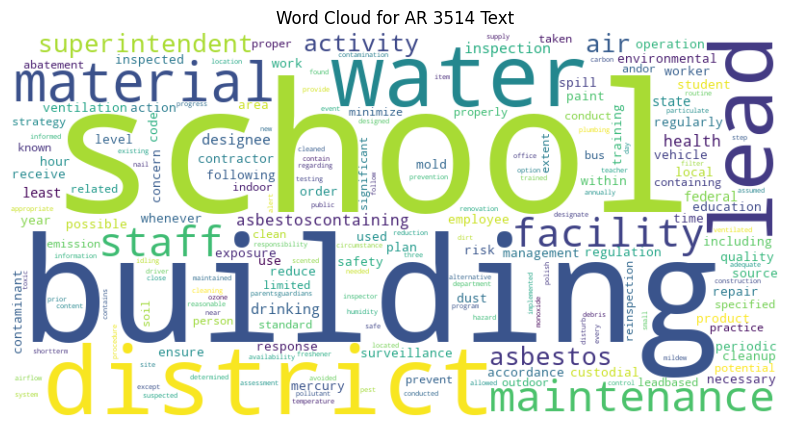

In [12]:
# Create word clouds for AR
create_word_cloud(ar3514_text_analysis, 'Word Cloud for AR 3514 Text')

## Sentiment Analysis

In [13]:
from textblob import TextBlob

def analyze_sentiment(text):
    return TextBlob(text).sentiment

In [14]:
# Apply sentiment analysis to a column of text
data_bp['Sentiment'] = data_bp['BP3514: PDF Text'].apply(lambda x: analyze_sentiment(x) if pd.notna(x) else None)
data_ar['Sentiment'] = data_ar['AR3514: PDF Text'].apply(lambda x: analyze_sentiment(x) if pd.notna(x) else None)

## Polarity and Subjectivity of BP Text

In [15]:
# Calculate average polarity and subjectivity for the dataset
average_polarity = data_bp['Sentiment'].apply(lambda x: x.polarity if x is not None else None).mean()
average_subjectivity= data_bp['Sentiment'].apply(lambda x: x.subjectivity if x is not None else None).mean()

print("BP Average Polarity: ", average_polarity)
print("BP Average Subjectivity: ", average_subjectivity)

BP Average Polarity:  0.21720781388958993
BP Average Subjectivity:  0.43262369061231454


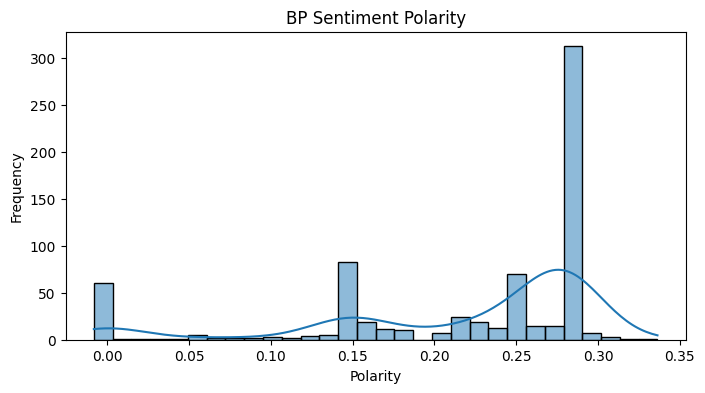

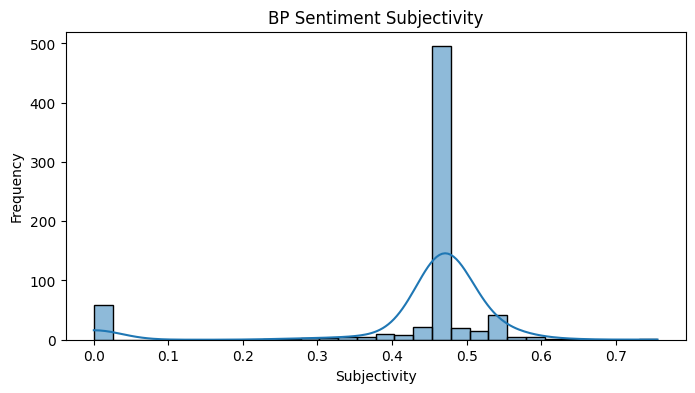

In [16]:
# Create separate columns for polarity and subjectivity
data_bp['Polarity'] = data_bp['Sentiment'].apply(lambda x: x.polarity if x is not None else None)
data_bp['Subjectivity'] = data_bp['Sentiment'].apply(lambda x: x.subjectivity if x is not None else None)

# Histogram of polarity
plt.figure(figsize=(8, 4))
sns.histplot(data_bp['Polarity'].dropna(), bins=30, kde=True)
plt.title('BP Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Histogram of subjectivity
plt.figure(figsize=(8, 4))
sns.histplot(data_bp['Subjectivity'].dropna(), bins=30, kde=True)
plt.title('BP Sentiment Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

              Polarity  Subjectivity  Action Score
Polarity      1.000000      0.775676     -0.016667
Subjectivity  0.775676      1.000000     -0.016062
Action Score -0.016667     -0.016062      1.000000


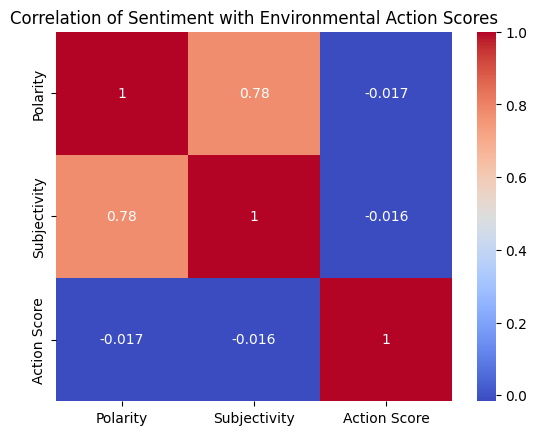

In [17]:
# Correlation of sentiment with environmental action score
correlation_matrix = data_bp[['Polarity', 'Subjectivity', 'Action Score']].corr()
print(correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Sentiment with Environmental Action Scores')
plt.show()

In [18]:
# Group by 'District Type' and calculate the average 'Polarity' and 'Subjectivity'
grouped_sentiment = data_bp.groupby('District Type').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

# Display the DataFrame with a light blue background for better presentation
styled_table = grouped_sentiment.style.background_gradient(cmap='Blues')
styled_table

,District Type,Polarity,Subjectivity
0,Elementary School District,0.223092,0.438447
1,High School District,0.228513,0.439666
2,Unified School District,0.208536,0.424908


In [19]:
# Group by County and calculate average polarity and subjectivity
grouped_sentiment = data_bp.groupby('County').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

print(grouped_sentiment)

             County  Polarity  Subjectivity
0           Alameda  0.191796      0.409499
1            Alpine  0.280000      0.473846
2            Amador  0.144522      0.461158
3             Butte  0.249571      0.436826
4         Calaveras  0.269333      0.469495
5            Colusa  0.247174      0.471773
6      Contra Costa  0.223857      0.435400
7         Del Norte  0.280000      0.473846
8         El Dorado  0.208484      0.417478
9            Fresno  0.199646      0.387547
10            Glenn  0.273600      0.471235
11         Humboldt  0.234494      0.465533
12         Imperial  0.219818      0.419432
13             Inyo  0.210000      0.355385
14             Kern  0.224749      0.451201
15            Kings  0.233253      0.434611
16             Lake  0.177174      0.353311
17           Lassen  0.172466      0.409972
18      Los Angeles  0.222203      0.480426
19           Madera  0.279295      0.455403
20            Marin  0.242781      0.460840
21         Mariposa  0.000000   

In [20]:
# Determine top-performing schools
threshold = data_bp['Action Score'].quantile(0.9)  # top 10%
top_schools = data_bp[data_bp['Action Score'] >= threshold]

# Analyze text data of top-performing schools
top_terms = analyze_text(top_schools, 'BP3514: PDF Text')
print("Top terms in high-scoring schools:")
print(top_terms.head(20))

Top terms in high-scoring schools:
staff             445
school            408
environmental     350
student           335
facility          273
designee          257
hazard            250
superintendent    249
district          248
healthy           214
strategy          214
health            212
board             197
air               187
andor             179
provide           179
risk              178
agency            163
quality           153
reducing          146
dtype: int64


In [21]:
# Determine lower-performing schools
low_threshold = data_bp['Action Score'].quantile(0.1)  # bottom 10%
low_schools = data_bp[data_bp['Action Score'] <= low_threshold]

# Analyze text data of lower-performing schools
low_terms = analyze_text(low_schools, 'BP3514: PDF Text')
print("Top terms in low-scoring schools:")
print(low_terms.head(20))


Top terms in low-scoring schools:
district          955
student           940
school            891
staff             622
board             483
environmental     410
facility          406
superintendent    368
designee          367
employee          323
hazard            318
policy            300
health            299
strategy          295
provide           293
andor             284
healthy           272
agency            263
risk              244
code              231
dtype: int64


## Polarity and Subjectivity of AR Text

In [22]:
# Calculate average polarity and subjectivity for the dataset
average_polarity = data_ar['Sentiment'].apply(lambda x: x.polarity if x is not None else None).mean()
average_subjectivity= data_ar['Sentiment'].apply(lambda x: x.subjectivity if x is not None else None).mean()

print("AR Average Polarity: ", average_polarity)
print("AR Average Subjectivity: ", average_subjectivity)

AR Average Polarity:  0.051261833601214606
AR Average Subjectivity:  0.3413494681281145


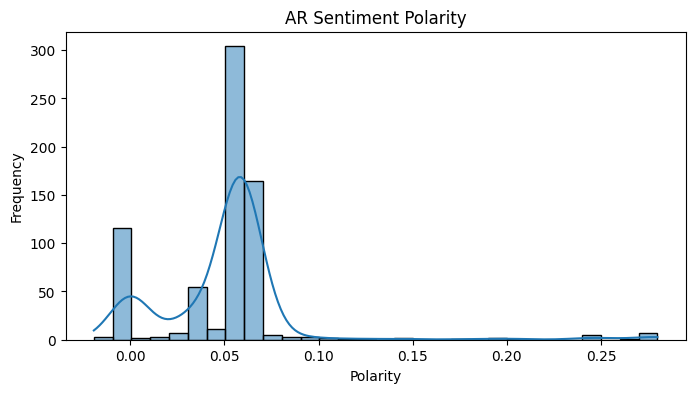

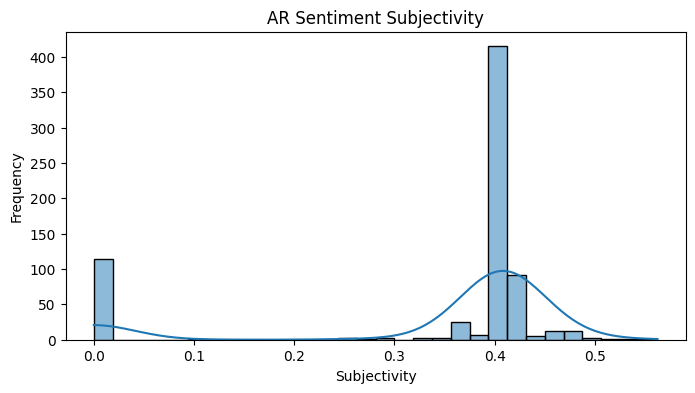

In [23]:
# Create separate columns for polarity and subjectivity
data_ar['Polarity'] = data_ar['Sentiment'].apply(lambda x: x.polarity if x is not None else None)
data_ar['Subjectivity'] = data_ar['Sentiment'].apply(lambda x: x.subjectivity if x is not None else None)

# Histogram of polarity
plt.figure(figsize=(8, 4))
sns.histplot(data_ar['Polarity'].dropna(), bins=30, kde=True)
plt.title('AR Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Histogram of subjectivity
plt.figure(figsize=(8, 4))
sns.histplot(data_ar['Subjectivity'].dropna(), bins=30, kde=True)
plt.title('AR Sentiment Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

              Polarity  Subjectivity  Action Score
Polarity      1.000000      0.615833     -0.049606
Subjectivity  0.615833      1.000000     -0.048649
Action Score -0.049606     -0.048649      1.000000


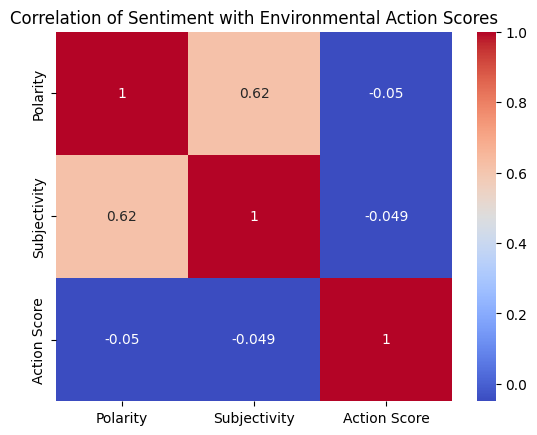

In [24]:
# Correlation of sentiment with environmental action score
correlation_matrix = data_ar[['Polarity', 'Subjectivity', 'Action Score']].corr()
print(correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Sentiment with Environmental Action Scores')
plt.show()

In [25]:
# Group by 'District Type' and calculate the average 'Polarity' and 'Subjectivity'
grouped_sentiment = data_ar.groupby('District Type').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

# Display the DataFrame with a light blue background for better presentation
styled_table = grouped_sentiment.style.background_gradient(cmap='Blues')
styled_table

,District Type,Polarity,Subjectivity
0,Elementary School District,0.053097,0.345328
1,High School District,0.053588,0.352492
2,Unified School District,0.048816,0.334776


In [26]:
# Group by County and calculate average polarity and subjectivity
grouped_sentiment = data_ar.groupby('County').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

print(grouped_sentiment)

             County  Polarity  Subjectivity
0           Alameda  0.039598      0.330417
1            Alpine  0.055833      0.408889
2            Amador  0.063880      0.398577
3             Butte  0.075096      0.365035
4         Calaveras  0.070126      0.430124
5            Colusa  0.043967      0.307666
6      Contra Costa  0.044323      0.343286
7         Del Norte  0.055833      0.408889
8         El Dorado  0.055823      0.297754
9            Fresno  0.070150      0.324270
10            Glenn  0.059606      0.408519
11         Humboldt  0.070461      0.345082
12         Imperial  0.041969      0.331543
13             Inyo  0.056469      0.409994
14             Kern  0.072621      0.351248
15            Kings  0.043809      0.347509
16             Lake  0.056480      0.398472
17           Lassen  0.042447      0.343717
18      Los Angeles  0.046005      0.333541
19           Madera  0.050219      0.358510
20            Marin  0.036270      0.288541
21         Mariposa  0.000000   

In [27]:
# Determine top-performing schools
threshold = data_ar['Action Score'].quantile(0.9)  # top 10%
top_schools = data_ar[data_ar['Action Score'] >= threshold]

# Analyze text data of top-performing schools
top_terms = analyze_text(top_schools, 'AR3514: PDF Text')
print("Top terms in high-scoring schools:")
print(top_terms.head(20))

Top terms in high-scoring schools:
school                1710
building              1051
district               927
water                  778
lead                   764
material               745
maintenance            732
staff                  661
facility               615
superintendent         608
air                    600
asbestos               560
asbestoscontaining     524
activity               521
health                 506
inspection             477
designee               471
drinking               469
least                  427
federal                419
dtype: int64


In [28]:
# Determine lower-performing schools
low_threshold = data_ar['Action Score'].quantile(0.1)  # bottom 10%
low_schools = data_ar[data_ar['Action Score'] <= low_threshold]

# Analyze text data of lower-performing schools
low_terms = analyze_text(low_schools, 'AR3514: PDF Text')
print("Top terms in low-scoring schools:")
print(low_terms.head(20))

Top terms in low-scoring schools:
school                2366
building              1486
district              1287
water                 1102
lead                  1083
material              1054
maintenance           1051
staff                  951
facility               885
superintendent         832
asbestos               805
air                    798
asbestoscontaining     757
activity               756
health                 747
drinking               695
inspection             685
designee               684
least                  609
federal                605
dtype: int64


Action Score                                                                       1.000000
W/O Policy Environmental and Climate Action Score (17 points)                      0.993847
Overall District Action and Literacy Initiative Indicators (up to 10)              0.900149
District-Wide Campus Sustainability Indicators (up to 3)                           0.744149
District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3)    0.729517
District-Wide Environmental Community and Culture Indicators (up to 3)             0.711990
Staff Capacity Indicators (up to 4)                                                0.690610
Plans, Communication, and Awards Indicators (up to 3)                              0.649303
On-Site Renewables                                                                 0.562541
School Gardens                                                                     0.524514
Energy Efficiency                                                               

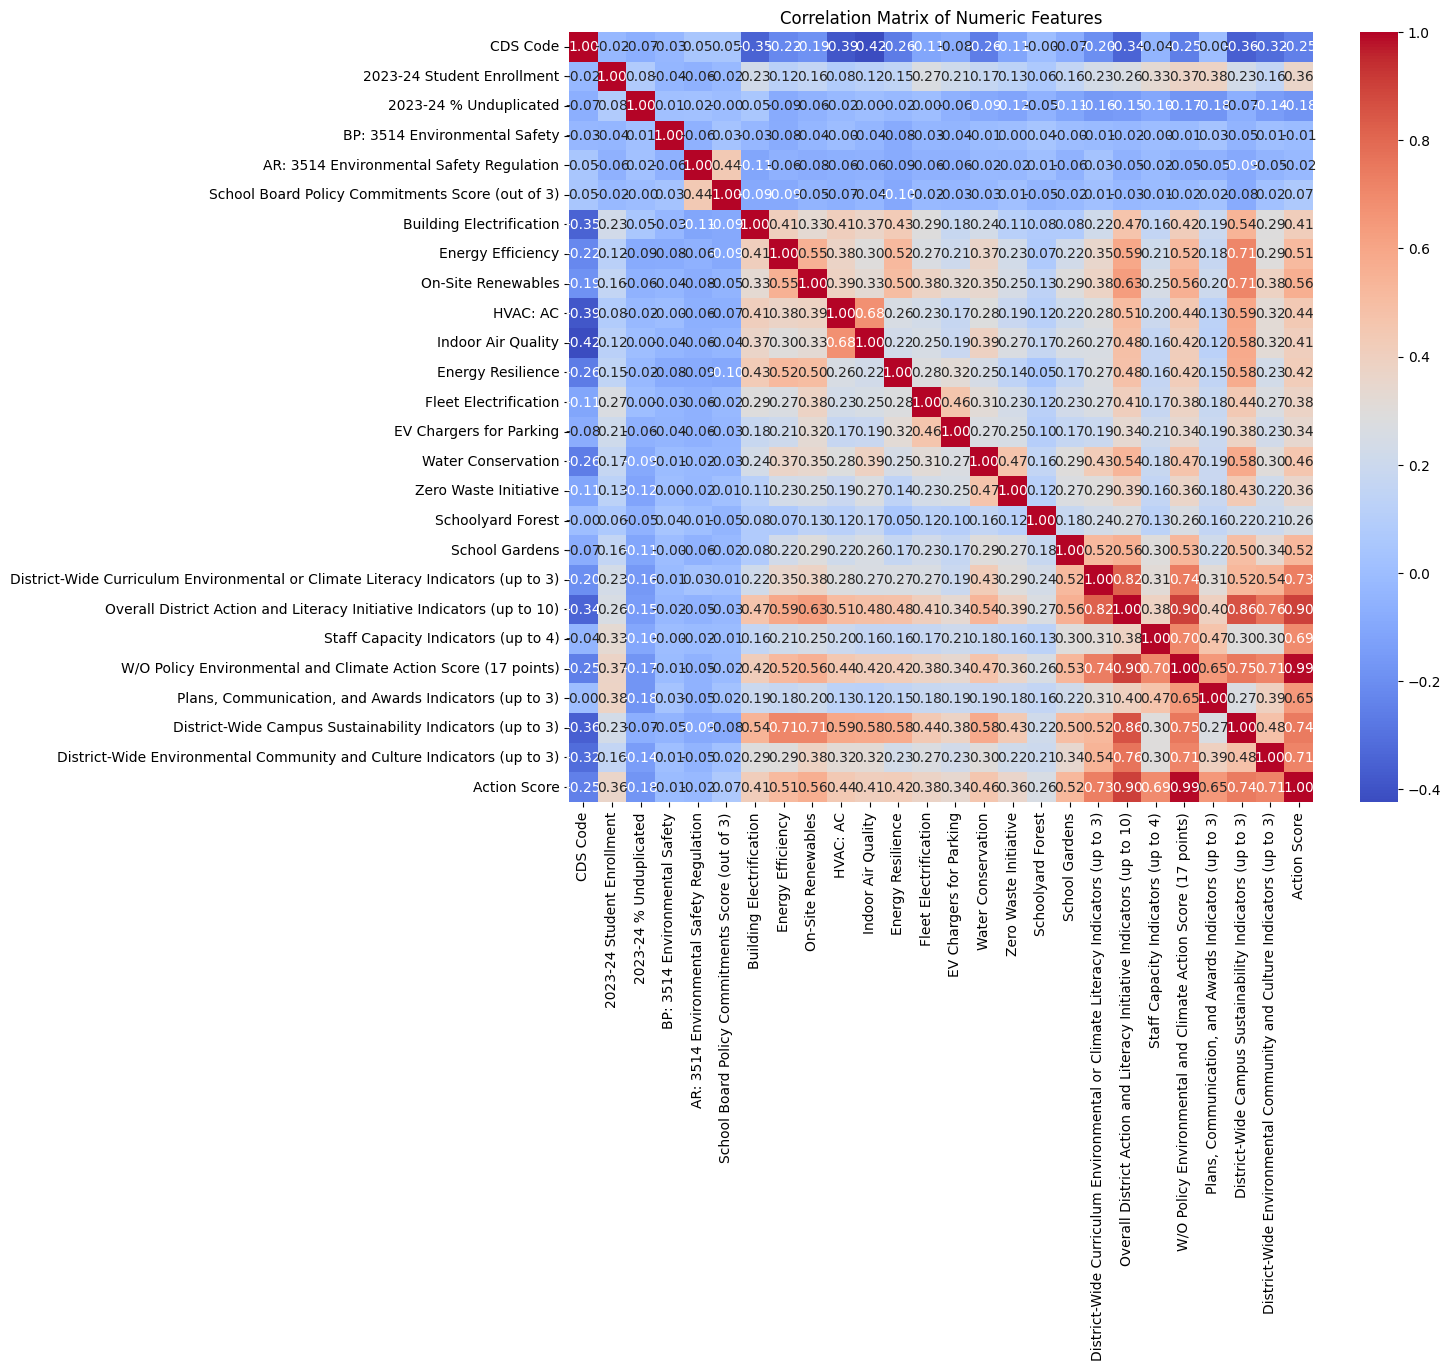

In [29]:
# Drop non-numeric columns for correlation analysis
numeric_cols = data.select_dtypes(include=[np.number])
numeric_cols.fillna(numeric_cols.mean(), inplace=True)

# Calculate correlations
correlation_matrix = numeric_cols.corr()

# Print the correlation with 'Environmental and Climate Action Score (20 points)'
target_correlation = correlation_matrix['Action Score']
print(target_correlation.sort_values(ascending=False))

# Visualization with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()